In [130]:
import numpy as np
import pandas as pd

In [131]:
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']

file_path = 'spam.csv'

for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"file successully read with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"failed to read with encoding: {encoding}")
        continue

if 'df' in locals():
    print("CSV file has been succesfully loaded.")
else:
    print("all encodings attempt failed. unable to read the CSV file.")

failed to read with encoding: utf-8
file successully read with encoding: latin1
CSV file has been succesfully loaded.


In [132]:
# spam -> spam message
# ham -> legitimate message
df.sample(10) 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1509,ham,When u love someone Dont make them to love u a...,NaN,NaN,NaN
5475,ham,Dhoni have luck to win some big title.so we wi...,NaN,NaN,NaN
3260,ham,Yup i'm still having coffee wif my frens... My...,NaN,NaN,NaN
2919,ham,"Thanx 4 the time weåÕve spent 2geva, its bin m...",NaN,NaN,NaN
4154,spam,Want a new Video Phone? 750 anytime any networ...,NaN,NaN,NaN
2496,ham,HCL chennai requires FRESHERS for voice proces...,NaN,NaN,NaN
4527,ham,HOW ARE U? I HAVE MISSED U! I HAVENT BEEN UP 2...,NaN,NaN,NaN
699,ham,K..u also dont msg or reply to his msg..,NaN,NaN,NaN
1831,ham,Hello- thanx for taking that call. I got a job...,NaN,NaN,NaN
5092,ham,"My fri ah... Okie lor,goin 4 my drivin den go ...",NaN,NaN,NaN


In [133]:
# (rows, columns)
df.shape

(5572, 5)

---
### **1. Data Cleaning**

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [135]:
# dropping last 3 columns which are not usable
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [136]:
df.sample(5)

,v1,v2
1422,spam,Congratulations ur awarded either å£500 of CD ...
5233,ham,Hey what how about your project. Started aha da.
5339,ham,You'd like that wouldn't you? Jerk!
3540,ham,If you are not coughing then its nothing
905,ham,Hey what's up charles sorry about the late reply.


In [137]:
# renaming the columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [138]:
df.sample(5)

,target,text
5557,ham,No. I meant the calculation is the same. That ...
2133,ham,Spoke with uncle john today. He strongly feels...
2954,ham,Id have to check but there's only like 1 bowls...
5468,spam,URGENT! Last weekend's draw shows that you hav...
5252,ham,You do your studies alone without anyones help...


In [139]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [140]:
df['target'] = encoder.fit_transform(df['target'])
# 0 -> ham
# 1 -> spam

In [141]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [142]:
# check for missing values
print(df.isnull().sum())

target    0
text      0
dtype: int64


In [143]:
# check for duplicate values
print(df.duplicated().sum())

403


In [144]:
df = df.drop_duplicates(keep='first')

In [145]:
print(df.duplicated().sum())

0


In [146]:
df.shape
# after removing 3 columns and 403 duplicate values

(5169, 2)

---
### **2. Exploratory Data Analysis (EDA)**

In [147]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [148]:
df['target'].value_counts()
# 4516 ham SMS
# 653 spam SMS

target
0    4516
1     653
Name: count, dtype: int64

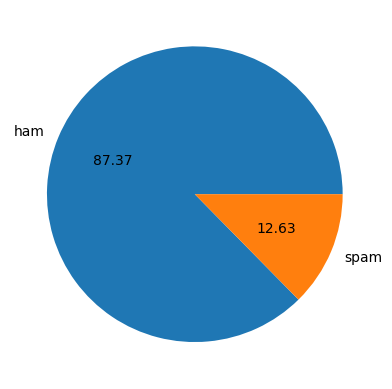

In [149]:
import matplotlib.pyplot as plt

counts = df['target'].value_counts()

plt.pie(counts, labels=['ham', 'spam'], autopct="%0.2f")
plt.show()


In [150]:
# !pip install nltk 

In [151]:
import nltk
# natural language tool kit

In [152]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Vaibhav
[nltk_data]     Tandon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [153]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [154]:
df['num_characters']=df['text'].apply(len)

In [155]:
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [156]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [157]:
df['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [158]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [159]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [160]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [161]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()
# only for ham SMS

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [162]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()
# only for spam SMS

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [163]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

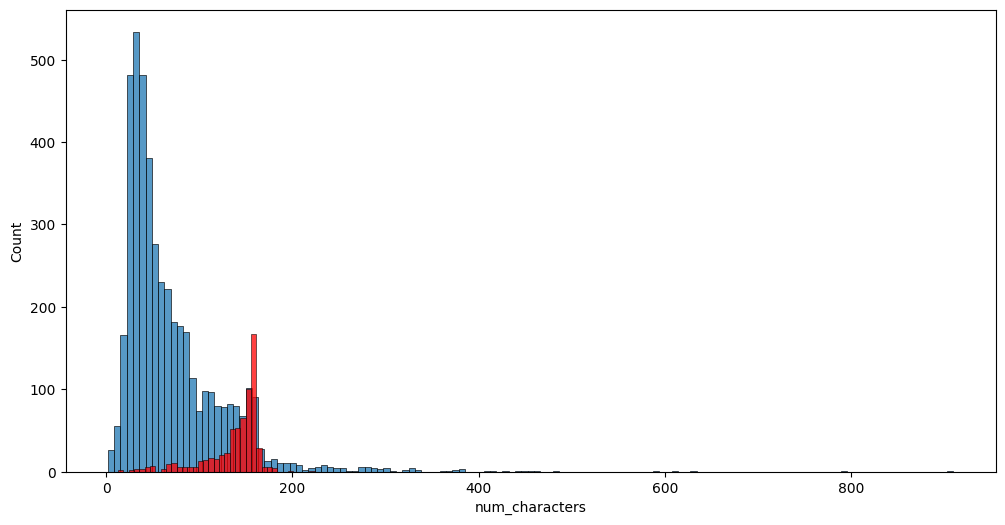

In [164]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters']) # for ham msgs
sns.histplot(df[df['target']==1]['num_characters'], color='red') # for spam msgs

<Axes: xlabel='num_words', ylabel='Count'>

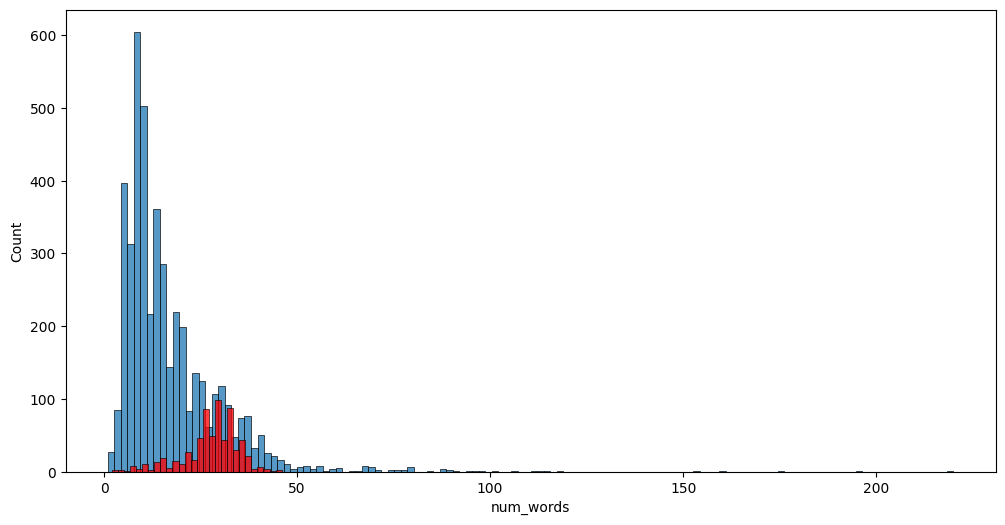

In [165]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words']) # for ham msgs
sns.histplot(df[df['target']==1]['num_words'], color='red') # for spam msgs

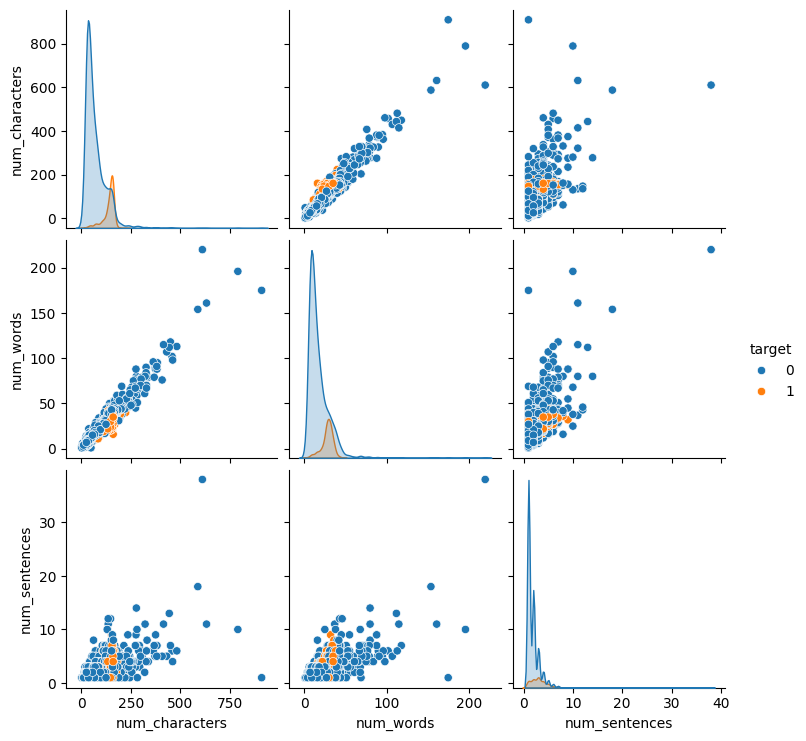

In [166]:
sns.pairplot(df,hue='target')

In [167]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

<Axes: >

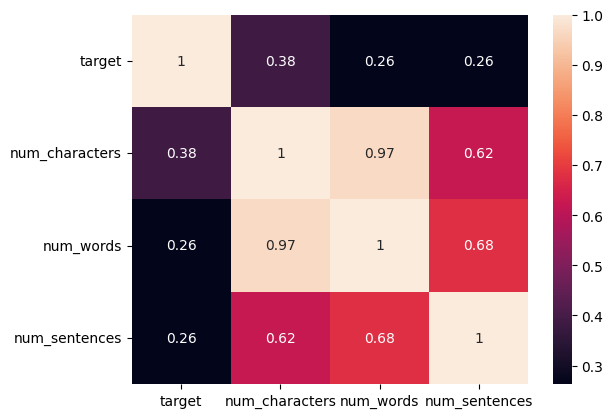

In [168]:
sns.heatmap(correlation_matrix,annot=True)

---
### **3. Data Preprocessing**
* *Lower case*
* *Tokenization*
* *Removing Special Characters*
* *Removing Stop Words and Puntuation*
* *Stemming*

In [169]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Vaibhav
[nltk_data]     Tandon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [170]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [171]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [172]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
print(ps.stem('dancing'))
print(ps.stem('loved'))

danc
love


In [173]:
def tranform_text(text):
    text = text.lower() # lowercase
    text = nltk.word_tokenize(text) # tokenization
    
    y=[]
    for i in text:
        if i.isalnum(): # removing special characters
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            # removing stopwords and punctuations
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [174]:
tranform_text("Hi How are YoU vaibhav ?")
# how, are, you --> these are the stopwords
# ? --> it is in the punctuation

'hi vaibhav'

In [175]:
tranform_text("Did you like my presentation on ML?")

'like present ml'

In [176]:
tranform_text("I loved exploring ML-AI. How about you?")

'love explor'

In [177]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [178]:
tranform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [179]:
df['transformed_text'] = df['text'].apply(tranform_text)

In [180]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [181]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [182]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

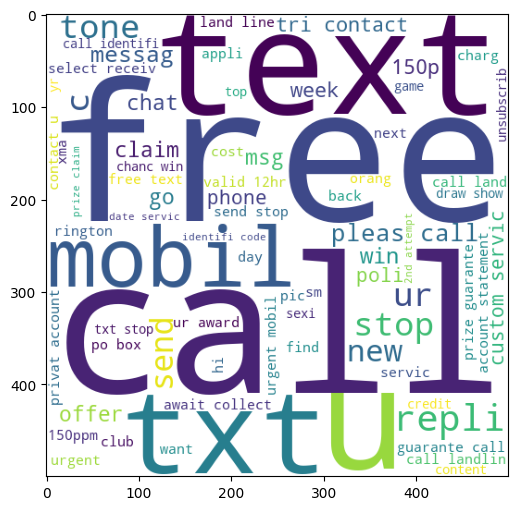

In [183]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [184]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

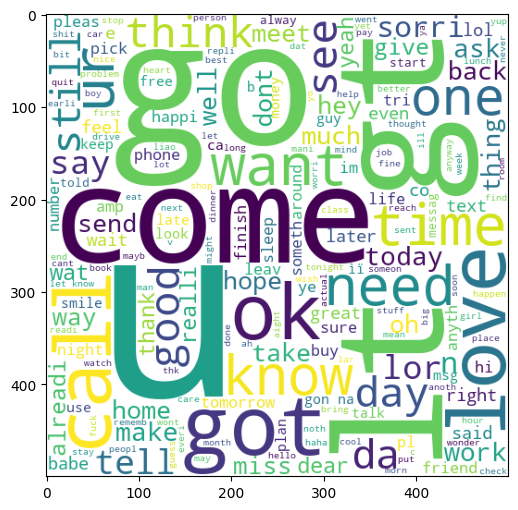

In [185]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [186]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [187]:
len(spam_corpus)

9939

In [188]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

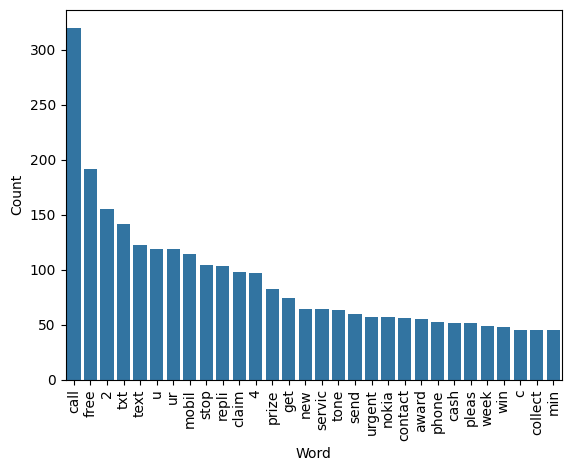

In [189]:
from collections import Counter
sns.barplot(x='Word', y='Count', data=pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count']))
plt.xticks(rotation='vertical')
plt.show()

In [190]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [191]:
len(ham_corpus)

35404

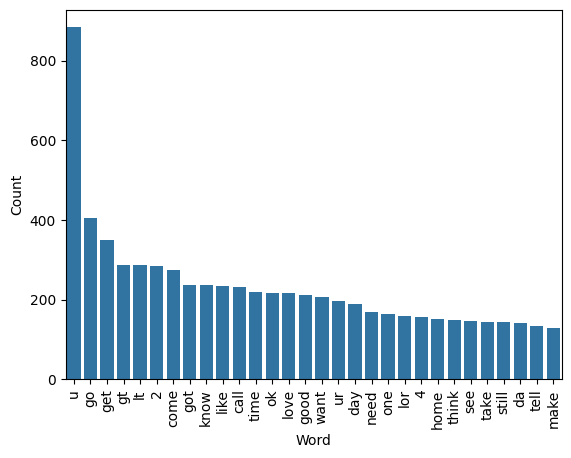

In [192]:
from collections import Counter
sns.barplot(x='Word', y='Count', data=pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count']))
plt.xticks(rotation='vertical')
plt.show()

In [193]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


---
### **4. Model Building**

In [194]:
# Text Vectorization
# Bag of Words

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [195]:
from sklearn.feature_extraction.text import TfidfVectorizer

sample_texts = [
    'go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
    'some other example text'
]

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(sample_texts).toarray()
print(X)


[[0.26726124 0.26726124 0.26726124 0.26726124 0.26726124 0.26726124
  0.         0.26726124 0.26726124 0.26726124 0.26726124 0.26726124
  0.         0.26726124 0.         0.         0.26726124 0.26726124]
 [0.         0.         0.         0.         0.         0.
  0.5        0.         0.         0.         0.         0.
  0.5        0.         0.5        0.5        0.         0.        ]]


In [196]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [197]:
X.shape

(5169, 6708)

In [198]:
Y = df['target'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)

In [201]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [202]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [203]:
# GaussianNB
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [204]:
# MultinomialNB
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [205]:
# # from sklearn.feature_extraction.text import TfidfVectorizer
# # from sklearn.naive_bayes import MultinomialNB
# from sklearn.pipeline import make_pipeline

# # # Define sample data
# # X_train = ['I love programming', 'Python is great', 'I enjoy learning new things', 'Programming is fun']
# # Y_train = [1, 1, 0, 1]
# # X_test = ['I love new programming languages']

# # Define the vectorizer and classifier
# # tfidf = TfidfVectorizer()
# # mnb = MultinomialNB()

# # Create a pipeline
# pipeline = make_pipeline(tfidf, mnb)

# # Fit the model
# pipeline.fit(X_train, Y_train)

# # Make predictions
# predictions = pipeline.predict(X_test)
# predictions


In [206]:
# BernoulliNB
bnb.fit(X_train,Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [207]:
# tfidf --> MNB

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [209]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [210]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [211]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [212]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9729206963249516, np.float64(0.9741379310344828))

In [213]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0


c:\Users\Vaibhav Tandon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [214]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [215]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,xgb,Accuracy,0.972921
7,LR,Accuracy,0.951644
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


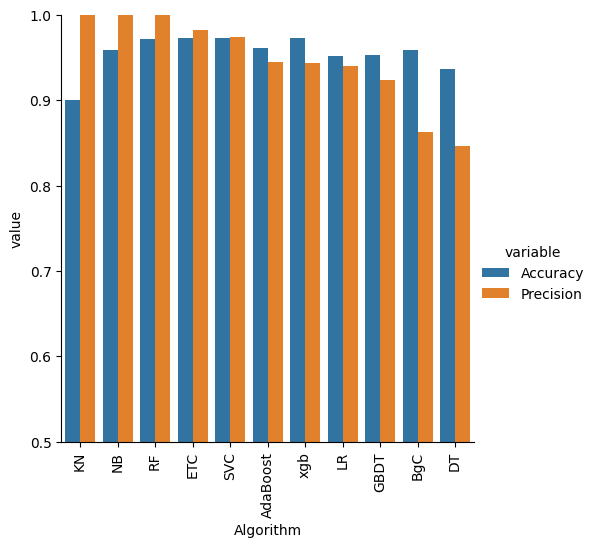

In [216]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [217]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [218]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [219]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [220]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df

,Algorithm,Accuracy,Precision,Accuracy_scaling,Precision_scaling
0,KN,0.900387,1.000000,0.900387,1.000000
1,NB,0.959381,1.000000,0.959381,1.000000
2,RF,0.971954,1.000000,0.971954,1.000000
3,ETC,0.972921,0.982456,0.972921,0.982456
4,SVC,0.972921,0.974138,0.972921,0.974138
5,AdaBoost,0.961315,0.945455,0.961315,0.945455
6,xgb,0.972921,0.943548,0.972921,0.943548
7,LR,0.951644,0.940000,0.951644,0.940000
8,GBDT,0.952611,0.923810,0.952611,0.923810
9,BgC,0.958414,0.862595,0.958414,0.862595


In [221]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [222]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [223]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000
1,NB,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000
2,RF,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
3,ETC,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
4,SVC,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138
5,AdaBoost,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455
6,xgb,0.972921,0.943548,0.972921,0.943548,0.972921,0.943548,0.972921,0.943548
7,LR,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000
8,GBDT,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810
9,BgC,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595


In [224]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [225]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [226]:
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [227]:
Y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

Accuracy 0.9787234042553191
Precision 1.0


In [228]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [229]:
from sklearn.ensemble import StackingClassifier

In [230]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [231]:
clf.fit(X_train,Y_train)

StackingClassifier(estimators=[('svm',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('nb', MultinomialNB()),
                               ('et',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [232]:
Y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [233]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))